<h1 style="text-align: center;">Preparación de los DATOS - Parte I</h1>

Cargamos el DataSet resultante del proceso de ETL


In [56]:
import pandas as pd

dataset_work_0 = pd.read_csv('D:\DataSet\DDJJ_Y_PAGOS.csv')
x = dataset_work_0.iloc[:,:-1]
y = dataset_work_0.iloc[:,-1].values
dataset_work_0.head(5)

,PERIODO,NRO,MONTO_IMPONIBLE,IMPUESTO_IB,IMPUESTO_AD,PERCEPCIONES,RETENCIONES,IF_BENEFICIO_LEY6093,IF_MECENAZCO_LEY1353,IF_CALL_CENTER_LEY1669,...,IF_OTROS,FECHA_PRESENTACION,FECHA_VENCIMIENTO,FECHA_PAGO,LOCALIDAD,PROVINCIA,TAMANO,TIPO_AFIP,EMPLEADOS,Desc_Actividad
0,201801,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,2018-06-12,2018-02-16,1753-01-01,JUAN JOSE CASTELLI ...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...
1,201808,1,2500.0,87.5,8.75,0.0,0.0,0.0,0.0,0.0,...,0.0,2018-11-08,2018-09-18,1753-01-01,JUAN JOSE CASTELLI ...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...
2,201811,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,2019-03-21,2018-12-18,1753-01-01,JUAN JOSE CASTELLI ...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...
3,201901,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,2019-03-21,2019-02-18,1753-01-01,JUAN JOSE CASTELLI ...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...
4,201904,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,2019-08-10,2019-05-16,1753-01-01,JUAN JOSE CASTELLI ...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...


In [57]:
dataset_work_0.shape

(6512739, 25)

In [58]:
dataset_work_0.columns

Index(['PERIODO', 'NRO', 'MONTO_IMPONIBLE', 'IMPUESTO_IB', 'IMPUESTO_AD',
       'PERCEPCIONES', 'RETENCIONES', 'IF_BENEFICIO_LEY6093',
       'IF_MECENAZCO_LEY1353', 'IF_CALL_CENTER_LEY1669',
       'IF_SPONZORIZACION_LEY1772', 'IF_PROCHACO_LEY1822', 'IF_PYMES_LEY2077',
       'IF_GEMP_LEY2266', 'IF_TRANS_LEY2936', 'IF_OTROS', 'FECHA_PRESENTACION',
       'FECHA_VENCIMIENTO', 'FECHA_PAGO', 'LOCALIDAD', 'PROVINCIA', 'TAMANO',
       'TIPO_AFIP', 'EMPLEADOS', 'Desc_Actividad'],
      dtype='object')

Determinamos la cantidad de registros nulos en todas las variables.

In [59]:
# Obtener el conteo de valores nulos
nulos = dataset_work_0.isnull().sum()

# Convertir a DataFrame y agregar los títulos de columna
nulos_df = pd.DataFrame({'VARIABLE': nulos.index, 'VALORES NULOS': nulos.values})

# Imprimir el título con una línea de separación
print(f"{'VARIABLE':<30} {'VALORES NULOS'}")
print('-' * 45)

# Imprimir las variables alineadas a la izquierda con los valores nulos
for index, row in nulos_df.iterrows():
    print(f"{row['VARIABLE']:<30} {row['VALORES NULOS']}")


VARIABLE                       VALORES NULOS
---------------------------------------------
PERIODO                        0
NRO                            0
MONTO_IMPONIBLE                609
IMPUESTO_IB                    609
IMPUESTO_AD                    609
PERCEPCIONES                   0
RETENCIONES                    0
IF_BENEFICIO_LEY6093           0
IF_MECENAZCO_LEY1353           0
IF_CALL_CENTER_LEY1669         0
IF_SPONZORIZACION_LEY1772      0
IF_PROCHACO_LEY1822            0
IF_PYMES_LEY2077               0
IF_GEMP_LEY2266                0
IF_TRANS_LEY2936               0
IF_OTROS                       0
FECHA_PRESENTACION             0
FECHA_VENCIMIENTO              0
FECHA_PAGO                     0
LOCALIDAD                      0
PROVINCIA                      0
TAMANO                         0
TIPO_AFIP                      0
EMPLEADOS                      0
Desc_Actividad                 76226


In [60]:
# Obtener la lista de variables (columnas) con sus tipos de datos
variables_info = dataset_work_0.dtypes.reset_index()

# Renombrar las columnas para mayor claridad
variables_info.columns = ['VARIABLE', 'TIPO DE DATO']

# Añadir una columna con la numeración
variables_info['NÚMERO'] = range(1, len(variables_info) + 1)

# Reordenar las columnas para que la numeración aparezca primero
variables_info = variables_info[['NÚMERO', 'VARIABLE', 'TIPO DE DATO']]

# Imprimir el listado de variables con sus tipos de datos
print(variables_info.to_string(index=False))


 NÚMERO                  VARIABLE TIPO DE DATO
      1                   PERIODO        int64
      2                       NRO        int64
      3           MONTO_IMPONIBLE      float64
      4               IMPUESTO_IB      float64
      5               IMPUESTO_AD      float64
      6              PERCEPCIONES      float64
      7               RETENCIONES      float64
      8      IF_BENEFICIO_LEY6093      float64
      9      IF_MECENAZCO_LEY1353      float64
     10    IF_CALL_CENTER_LEY1669      float64
     11 IF_SPONZORIZACION_LEY1772      float64
     12       IF_PROCHACO_LEY1822      float64
     13          IF_PYMES_LEY2077      float64
     14           IF_GEMP_LEY2266      float64
     15          IF_TRANS_LEY2936      float64
     16                  IF_OTROS      float64
     17        FECHA_PRESENTACION       object
     18         FECHA_VENCIMIENTO       object
     19                FECHA_PAGO       object
     20                 LOCALIDAD       object
     21      

In [61]:
dataset_work_temp = dataset_work_0.copy()
# Extraer el año de la columna PERIODO (los primeros 4 dígitos)
dataset_work_temp['AÑO'] = dataset_work_temp['PERIODO'].astype(str).str[:4]

# Contar los nulos por año en cada columna
nulos_ib = dataset_work_temp[dataset_work_temp['IMPUESTO_IB'].isnull()].groupby('AÑO').size().reset_index(name='IMPUESTO_IB NULOS')
nulos_ad = dataset_work_temp[dataset_work_temp['IMPUESTO_AD'].isnull()].groupby('AÑO').size().reset_index(name='IMPUESTO_AD NULOS')
nulos_monto = dataset_work_temp[dataset_work_temp['MONTO_IMPONIBLE'].isnull()].groupby('AÑO').size().reset_index(name='MONTO_IMPONIBLE NULOS')

# Unir los resultados de las tres columnas en un solo DataFrame
nulos_totales = pd.merge(nulos_ib, nulos_ad, on='AÑO', how='outer')
nulos_totales = pd.merge(nulos_totales, nulos_monto, on='AÑO', how='outer')

# Reemplazar valores NaN por 0 en caso de que no haya nulos en alguna columna para un año dado
nulos_totales.fillna(0, inplace=True)

# Imprimir el listado con separación y alineación
print(f"{'AÑO':<10} {'IMPUESTO_IB NULOS':<20} {'IMPUESTO_AD NULOS':<20} {'MONTO_IMPONIBLE NULOS':<25}")
print('-' * 75)
for index, row in nulos_totales.iterrows():
    print(f"{row['AÑO']:<10} {int(row['IMPUESTO_IB NULOS']):<20} {int(row['IMPUESTO_AD NULOS']):<20} {int(row['MONTO_IMPONIBLE NULOS']):<25}")


AÑO        IMPUESTO_IB NULOS    IMPUESTO_AD NULOS    MONTO_IMPONIBLE NULOS    
---------------------------------------------------------------------------
2011       126                  126                  126                      
2012       167                  167                  167                      
2013       190                  190                  190                      
2014       83                   83                   83                       
2015       43                   43                   43                       


Analizamos cuales son las tuplas que tienen MONTO_IMPONIBLE en nulo para luego revisar en la base de datos original.

In [62]:
nulos_importe = dataset_work_0.query('MONTO_IMPONIBLE.isnull()')[[ 'PERIODO', 'MONTO_IMPONIBLE', 'IMPUESTO_IB','IMPUESTO_AD']]

nulos_importe.head(5)

,PERIODO,MONTO_IMPONIBLE,IMPUESTO_IB,IMPUESTO_AD
58085,201305,NaN,NaN,NaN
72051,201103,NaN,NaN,NaN
72052,201106,NaN,NaN,NaN
72053,201203,NaN,NaN,NaN
72054,201206,NaN,NaN,NaN


En la base de datos original se observa que estos registros aparecen como NULL, posiblemente debido a un error del sistema que los almacenó con dicho valor. 
Se decide eliminar estos registros, ya que no es posible asumir que corresponden a valores iguales a cero oa algún otro valor.

In [63]:
dataset_work_0 = dataset_work_0.dropna(subset=['MONTO_IMPONIBLE'])
dataset_work_0.isnull().sum()

PERIODO                          0
NRO                              0
MONTO_IMPONIBLE                  0
IMPUESTO_IB                      0
IMPUESTO_AD                      0
PERCEPCIONES                     0
RETENCIONES                      0
IF_BENEFICIO_LEY6093             0
IF_MECENAZCO_LEY1353             0
IF_CALL_CENTER_LEY1669           0
IF_SPONZORIZACION_LEY1772        0
IF_PROCHACO_LEY1822              0
IF_PYMES_LEY2077                 0
IF_GEMP_LEY2266                  0
IF_TRANS_LEY2936                 0
IF_OTROS                         0
FECHA_PRESENTACION               0
FECHA_VENCIMIENTO                0
FECHA_PAGO                       0
LOCALIDAD                        0
PROVINCIA                        0
TAMANO                           0
TIPO_AFIP                        0
EMPLEADOS                        0
Desc_Actividad               76226
dtype: int64

Analizamos cuales son las tuplas que tienen ACTIVIDAD en nulo para luego revisar en la base de datos original.

In [64]:
import pandas as pd
nulos_actividad = dataset_work_0.query('Desc_Actividad.isnull()')[[ 'PERIODO', 'MONTO_IMPONIBLE', 'PROVINCIA', 'LOCALIDAD', 'TIPO_AFIP','Desc_Actividad']]

nulos_actividad.head(5)

,PERIODO,MONTO_IMPONIBLE,PROVINCIA,LOCALIDAD,TIPO_AFIP,Desc_Actividad
266,201904,834484.39,CHACO,LOS FRENTONES ...,IVA,NaN
296,202001,206726.69,CHACO,LOS FRENTONES ...,IVA,NaN
487,202210,137100.00,CHACO,RESISTENCIA ...,MONOTRIBUTO,NaN
488,202303,354000.00,CHACO,RESISTENCIA ...,MONOTRIBUTO,NaN
489,202306,34000.00,CHACO,RESISTENCIA ...,MONOTRIBUTO,NaN


De manera similar a los casos de Monto Imponible con valores nulos, en este caso no es factible corregir los datos, ya que en la base de datos estos se encuentran registrados como nulos debido a diversas migraciones de datos realizadas anteriormente.
Se procede a eliminar las tuplas con estos valores.

In [65]:
dataset_work_0 = dataset_work_0.dropna(subset=['Desc_Actividad'])
dataset_work_0.isnull().sum()

PERIODO                      0
NRO                          0
MONTO_IMPONIBLE              0
IMPUESTO_IB                  0
IMPUESTO_AD                  0
PERCEPCIONES                 0
RETENCIONES                  0
IF_BENEFICIO_LEY6093         0
IF_MECENAZCO_LEY1353         0
IF_CALL_CENTER_LEY1669       0
IF_SPONZORIZACION_LEY1772    0
IF_PROCHACO_LEY1822          0
IF_PYMES_LEY2077             0
IF_GEMP_LEY2266              0
IF_TRANS_LEY2936             0
IF_OTROS                     0
FECHA_PRESENTACION           0
FECHA_VENCIMIENTO            0
FECHA_PAGO                   0
LOCALIDAD                    0
PROVINCIA                    0
TAMANO                       0
TIPO_AFIP                    0
EMPLEADOS                    0
Desc_Actividad               0
dtype: int64

In [66]:
dataset_work_0.shape

(6435904, 25)

Ahora analizamos la variable categoria PROVINCIA la vamos a convertir en numerica.  Para ello estudiamos los valores de la Variable Provincia.

In [67]:
conteo_provincias = dataset_work_0['PROVINCIA'].value_counts()
print(conteo_provincias)

PROVINCIA
CHACO              6418813
CORRIENTES            5374
BUENOS AIRES          3940
SANTA FE              2902
CORDOBA               1260
CAPITAL FEDERAL       1003
FORMOSA                572
MISIONES               377
STGO.DEL ESTERO        279
ENTRE RIOS             278
Capital Federal        274
MENDOZA                158
SALTA                  156
Buenos Aires           125
T.DEL FUEGO            105
LA RIOJA                80
SANTA CRUZ              53
Santa Cruz              51
NEUQUEN                 47
Mendoza                 26
CATAMARCA               11
TUCUMAN                  9
LA PAMPA                 9
SAN LUIS                 2
Name: count, dtype: int64


In [68]:
# Obtener el conteo de valores por provincia
conteo_provincias = dataset_work_0['PROVINCIA'].value_counts()

# Convertir a DataFrame y agregar los títulos de columna
provincia_df = pd.DataFrame({'PROVINCIA': nulos.index, 'CANTIDAD': nulos.values})

# Imprimir el título con una línea de separación
print(f"{'PROVINCIA':<30} {'CANTIDAD'}")
print('-' * 45)

# Imprimir las variables alineadas a la izquierda con los valores nulos
for index, row in provincia_df.iterrows():
    print(f"{row['PROVINCIA']:<30} {row['CANTIDAD']}")

PROVINCIA                      CANTIDAD
---------------------------------------------
PERIODO                        0
NRO                            0
MONTO_IMPONIBLE                609
IMPUESTO_IB                    609
IMPUESTO_AD                    609
PERCEPCIONES                   0
RETENCIONES                    0
IF_BENEFICIO_LEY6093           0
IF_MECENAZCO_LEY1353           0
IF_CALL_CENTER_LEY1669         0
IF_SPONZORIZACION_LEY1772      0
IF_PROCHACO_LEY1822            0
IF_PYMES_LEY2077               0
IF_GEMP_LEY2266                0
IF_TRANS_LEY2936               0
IF_OTROS                       0
FECHA_PRESENTACION             0
FECHA_VENCIMIENTO              0
FECHA_PAGO                     0
LOCALIDAD                      0
PROVINCIA                      0
TAMANO                         0
TIPO_AFIP                      0
EMPLEADOS                      0
Desc_Actividad                 76226


In [69]:
# Eliminar las filas donde PROVINCIA esté vacía o contenga solo espacios en blanco
dataset_work_0 = dataset_work_0[dataset_work_0['PROVINCIA'].str.strip() != '']

# Verificar que las filas han sido eliminadas
conteo_provincias = dataset_work_0['PROVINCIA'].value_counts()

print(conteo_provincias)

PROVINCIA
CHACO              6418813
CORRIENTES            5374
BUENOS AIRES          3940
SANTA FE              2902
CORDOBA               1260
CAPITAL FEDERAL       1003
FORMOSA                572
MISIONES               377
STGO.DEL ESTERO        279
ENTRE RIOS             278
Capital Federal        274
MENDOZA                158
SALTA                  156
Buenos Aires           125
T.DEL FUEGO            105
LA RIOJA                80
SANTA CRUZ              53
Santa Cruz              51
NEUQUEN                 47
Mendoza                 26
CATAMARCA               11
TUCUMAN                  9
LA PAMPA                 9
SAN LUIS                 2
Name: count, dtype: int64


Se revisa en la base de datos un muestreo de los registros y no se tiene registro de la localidad a las cuales perteneces esos registros, pero los nombre de las calles pertenecen a la provincia del chaco.

In [70]:
# Quitar espacios en blanco alrededor de los valores en la columna PROVINCIA
dataset_work_0['PROVINCIA'] = dataset_work_0['PROVINCIA'].str.strip()

# Reemplazar 'Buenos Aires' por 'BUENOS AIRES'
dataset_work_0['PROVINCIA'] = dataset_work_0['PROVINCIA'].replace('Buenos Aires', 'BUENOS AIRES')

dataset_work_0['PROVINCIA'] = dataset_work_0['PROVINCIA'].replace('BS.AIRES', 'BUENOS AIRES')
dataset_work_0['PROVINCIA'] = dataset_work_0['PROVINCIA'].replace('BS AS', 'BUENOS AIRES')
dataset_work_0['PROVINCIA'] = dataset_work_0['PROVINCIA'].replace('Capital Federal', 'CAPITAL FEDERAL')
dataset_work_0['PROVINCIA'] = dataset_work_0['PROVINCIA'].replace('Santa Cruz', 'SANTA CRUZ')
dataset_work_0['PROVINCIA'] = dataset_work_0['PROVINCIA'].replace('Mendoza', 'MENDOZA')
conteo_provincias = dataset_work_0['PROVINCIA'].value_counts()
conteo_provincias

PROVINCIA
CHACO              6418813
CORRIENTES            5374
BUENOS AIRES          4065
SANTA FE              2902
CAPITAL FEDERAL       1277
CORDOBA               1260
FORMOSA                572
MISIONES               377
STGO.DEL ESTERO        279
ENTRE RIOS             278
MENDOZA                184
SALTA                  156
T.DEL FUEGO            105
SANTA CRUZ             104
LA RIOJA                80
NEUQUEN                 47
CATAMARCA               11
TUCUMAN                  9
LA PAMPA                 9
SAN LUIS                 2
Name: count, dtype: int64

## Codificacion de Variables Categoricas

### Codificación Basada en Frecuencia (Frequency Encoding)

La **codificación basada en frecuencia (Frequency Encoding)** es un método eficiente y práctico para transformar variables categóricas en valores numéricos que pueden ser interpretados por algoritmos de machine learning. Este método reemplaza cada categoría por la frecuencia con la que aparece en el conjunto de datos, permitiendo capturar información relevante sobre la distribución de las categorías sin incrementar la dimensionalidad del dataset.

**Razones para utilizar Frequency Encoding:**
1. **Simplicidad y eficiencia:** Este enfoque no genera nuevas columnas, lo cual es particularmente útil en datasets con muchas categorías, ya que evita problemas de dimensionalidad que podrían surgir con métodos como la codificación one-hot.
2. **Preservación de información relevante:** Al representar la frecuencia de cada categoría, esta técnica permite al modelo captar posibles relaciones entre la prevalencia de las categorías y la variable objetivo, como el riesgo de morosidad impositiva en este caso.
3. **Reducción de ruido:** Este método es ideal para manejar desequilibrios en la cantidad de registros por categoría, especialmente en contextos donde la distribución desigual de las categorías puede influir en el desempeño del modelo.
4. **Compatibilidad con modelos avanzados:** La frecuencia relativa, como un valor numérico, puede ser interpretada de manera efectiva tanto por modelos lineales como por modelos más complejos, como árboles de decisión o redes neuronales.

La Frequency Encoding fue seleccionado debido a su capacidad para representar las categorías de manera compacta y efectiva, manteniendo la simplicidad del dataset y capturando información útil sobre las frecuencias relativas que podría estar correlacionada con la variable objetivo. Este enfoque resulta particularmente valioso en escenarios donde el desequilibrio en las frecuencias de las categorías puede tener un impacto significativo en el desempeño del modelo predictivo.

### Codificación de la variable PROVINCIA

In [71]:
# Supongamos que tienes un DataFrame llamado df con las columnas 'PROVINCIA' y 'MOROSIDAD'

# Calcular la frecuencia de cada provincia
frequency_encoding = dataset_work_0['PROVINCIA'].value_counts(normalize=True)

# Reemplazar la columna PROVINCIA con su frecuencia correspondiente
dataset_work_0['PROVINCIA_FREQ_ENC'] = dataset_work_0['PROVINCIA'].map(frequency_encoding)


# Contar las ocurrencias de cada PROVINCIA
conteo_provincia = dataset_work_0['PROVINCIA'].value_counts().reset_index()
conteo_provincia.columns = ['PROVINCIA', 'CANTIDAD']

# Añadir la columna COD_PROVINCIA a partir del dataframe original, eliminando duplicados
cod_provincia_unique = dataset_work_0[['PROVINCIA', 'PROVINCIA_FREQ_ENC']].drop_duplicates()

# Unir ambos dataframes
conteo_provincia = pd.merge(conteo_provincia, cod_provincia_unique, on='PROVINCIA')
conteo_provincia


,PROVINCIA,CANTIDAD,PROVINCIA_FREQ_ENC
0,CHACO,6418813,9.973444e-01
1,CORRIENTES,5374,8.350031e-04
2,BUENOS AIRES,4065,6.316129e-04
3,SANTA FE,2902,4.509079e-04
4,CAPITAL FEDERAL,1277,1.984181e-04
5,CORDOBA,1260,1.957767e-04
6,FORMOSA,572,8.887640e-05
7,MISIONES,377,5.857763e-05
8,STGO.DEL ESTERO,279,4.335055e-05
9,ENTRE RIOS,278,4.319518e-05


### Codificación de la variable LOCALIDAD

Dado que ya hemos aplicado Frequency Encoding a PROVINCIA, se trabaja con la Codificación Dependiente para capturar la relación jerárquica entre PROVINCIA y LOCALIDAD.  Este enfoque creará una nueva variable LOCALIDAD_IN_PROVINCIA_FREQ que captura la frecuencia relativa de cada LOCALIDAD dentro de su PROVINCIA, lo cual puede ser más informativo que solo la frecuencia general de la LOCALIDAD en todo el conjunto de datos.


In [72]:
# Paso 1: Calcular el conteo de cada combinación PROVINCIA-LOCALIDAD
prov_loc_counts = dataset_work_0.groupby(['PROVINCIA', 'LOCALIDAD']).size().reset_index(name='COUNT_PROV_LOC')

# Paso 2: Calcular el conteo total por PROVINCIA
prov_counts = dataset_work_0.groupby('PROVINCIA').size().reset_index(name='COUNT_PROVINCIA')

# Paso 3: Unir los conteos y calcular la frecuencia
merged_counts = pd.merge(prov_loc_counts, prov_counts, on='PROVINCIA')
merged_counts['LOCALIDAD_IN_PROVINCIA_FREQ'] = merged_counts['COUNT_PROV_LOC'] / merged_counts['COUNT_PROVINCIA']

# Paso 4: Unir las frecuencias al DataFrame original
dataset_work_0 = pd.merge(dataset_work_0, merged_counts[['PROVINCIA', 'LOCALIDAD', 'LOCALIDAD_IN_PROVINCIA_FREQ']], on=['PROVINCIA', 'LOCALIDAD'], how='left')

# Paso 5: Verificar el resultado
display(dataset_work_0.head(5))


,PERIODO,NRO,MONTO_IMPONIBLE,IMPUESTO_IB,IMPUESTO_AD,PERCEPCIONES,RETENCIONES,IF_BENEFICIO_LEY6093,IF_MECENAZCO_LEY1353,IF_CALL_CENTER_LEY1669,...,FECHA_VENCIMIENTO,FECHA_PAGO,LOCALIDAD,PROVINCIA,TAMANO,TIPO_AFIP,EMPLEADOS,Desc_Actividad,PROVINCIA_FREQ_ENC,LOCALIDAD_IN_PROVINCIA_FREQ
0,201801,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,2018-02-16,1753-01-01,JUAN JOSE CASTELLI ...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...,0.997344,0.030678
1,201808,1,2500.0,87.5,8.75,0.0,0.0,0.0,0.0,0.0,...,2018-09-18,1753-01-01,JUAN JOSE CASTELLI ...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...,0.997344,0.030678
2,201811,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,2018-12-18,1753-01-01,JUAN JOSE CASTELLI ...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...,0.997344,0.030678
3,201901,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,2019-02-18,1753-01-01,JUAN JOSE CASTELLI ...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...,0.997344,0.030678
4,201904,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,2019-05-16,1753-01-01,JUAN JOSE CASTELLI ...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...,0.997344,0.030678


### Codificación de la variable TIPO_AFIP

In [73]:
# Supongamos que tienes un DataFrame llamado df con las columnas 'TIPO_AFIP' y 'MOROSIDAD'

# Calcular la frecuencia de cada tipo AFIP
frequency_encoding = dataset_work_0['TIPO_AFIP'].value_counts(normalize=True)

# Reemplazar la columna TIPO_AFIP con su frecuencia correspondiente
dataset_work_0['TIPO_AFIP_FREQ_ENC'] = dataset_work_0['TIPO_AFIP'].map(frequency_encoding)

# Contar las ocurrencias de cada TIPO_AFIP
conteo_tipo_afip = dataset_work_0['TIPO_AFIP'].value_counts().reset_index()
conteo_tipo_afip.columns = ['TIPO_AFIP', 'CANTIDAD']

# Añadir la columna CONTEO_TIPO_AFIP a partir del dataframe original, eliminando duplicados
conteo_tipo_afip_unique = dataset_work_0[['TIPO_AFIP', 'TIPO_AFIP_FREQ_ENC']].drop_duplicates()

# Unir ambos dataframes
conteo_tipo_afip = pd.merge(conteo_tipo_afip, conteo_tipo_afip_unique, on='TIPO_AFIP')
conteo_tipo_afip

,TIPO_AFIP,CANTIDAD,TIPO_AFIP_FREQ_ENC
0,MONOTRIBUTO,4435278,0.689146
1,IVA,1860053,0.289012
2,IVA EXENTO,133435,0.020733
3,IVA RESP. NO INSCRIPTO,6724,0.001045
4,VER,414,0.000064


### Codificación de la variable TAMANO

In [74]:
# Supongamos que tienes un DataFrame llamado df con las columnas 'TAMAÑO' y 'MOROSIDAD'

# Calcular la frecuencia de cada tipo TAMANO
frequency_encoding = dataset_work_0['TAMANO'].value_counts(normalize=True)

# Reemplazar la columna TAMAÑO con su frecuencia correspondiente
dataset_work_0['TAMANO_FREQ_ENC'] = dataset_work_0['TAMANO'].map(frequency_encoding)

# Contar las ocurrencias de cada TAMANO
conteo_tamano = dataset_work_0['TAMANO'].value_counts().reset_index()
conteo_tamano.columns = ['TAMANO', 'CANTIDAD']

# Añadir la columna conteo_tamano a partir del dataframe original, eliminando duplicados
conteo_tamano_unique = dataset_work_0[['TAMANO', 'TAMANO_FREQ_ENC']].drop_duplicates()

# Unir ambos dataframes
conteo_tamano = pd.merge(conteo_tamano, conteo_tamano_unique, on='TAMANO')
conteo_tamano

,TAMANO,CANTIDAD,TAMANO_FREQ_ENC
0,Común,4035706,0.627061
1,Reg.Simplif. Unif.,2253325,0.350118
2,Conv. Multilateral,126239,0.019615
3,Medianos,10631,0.001652
4,Gran Contribuyente,5972,0.000928
5,Cat. I Reg. Simplifi,2438,0.000379
6,Cat. II Reg.Simplifi,1593,0.000248


### Codificación de la variable ACTIVIDAD

In [75]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df con las columnas 'Des_Actividad' y 'MOROSIDAD'

# Calcular la frecuencia de cada actividad
frequency_encoding = dataset_work_0['Desc_Actividad'].value_counts(normalize=True)

# Reemplazar la columna Des_Actividad con su frecuencia correspondiente
dataset_work_0['Desc_Actividad_FREQ_ENC'] = dataset_work_0['Desc_Actividad'].map(frequency_encoding)

# Mostrar las primeras filas para verificar
display(dataset_work_0.head(5))


,PERIODO,NRO,MONTO_IMPONIBLE,IMPUESTO_IB,IMPUESTO_AD,PERCEPCIONES,RETENCIONES,IF_BENEFICIO_LEY6093,IF_MECENAZCO_LEY1353,IF_CALL_CENTER_LEY1669,...,PROVINCIA,TAMANO,TIPO_AFIP,EMPLEADOS,Desc_Actividad,PROVINCIA_FREQ_ENC,LOCALIDAD_IN_PROVINCIA_FREQ,TIPO_AFIP_FREQ_ENC,TAMANO_FREQ_ENC,Desc_Actividad_FREQ_ENC
0,201801,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...,0.997344,0.030678,0.689146,0.627061,0.000944
1,201808,1,2500.0,87.5,8.75,0.0,0.0,0.0,0.0,0.0,...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...,0.997344,0.030678,0.689146,0.627061,0.000944
2,201811,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...,0.997344,0.030678,0.689146,0.627061,0.000944
3,201901,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...,0.997344,0.030678,0.689146,0.627061,0.000944
4,201904,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,CHACO,Común,MONOTRIBUTO,0,Servicios de difusión musical ...,0.997344,0.030678,0.689146,0.627061,0.000944


Eliminamos las columnas categoricas que se han codificado

In [76]:
# Copia el DataFrame original en un nuevo DataFrame
dataset_work_1 = dataset_work_0.copy()

# Eliminar la columna PROVINCIA del dataset
dataset_work_1 = dataset_work_1.drop(columns=['PROVINCIA'])
dataset_work_1 = dataset_work_1.drop(columns=['LOCALIDAD'])
dataset_work_1 = dataset_work_1.drop(columns=['TAMANO'])
dataset_work_1 = dataset_work_1.drop(columns=['TIPO_AFIP'])
dataset_work_1 = dataset_work_1.drop(columns=['Desc_Actividad'])
# Verificar que la columna ha sido eliminada
dataset_work_1.head(10)


# Renombrar columnas
dataset_work_1.rename(columns={
    'LOCALIDAD_IN_PROVINCIA_FREQ': 'LOCALIDAD',
    'TAMANO_FREQ_ENC': 'TAMANO',
    'TIPO_AFIP_FREQ_ENC': 'CONDICION_AFIP',
    'Desc_Actividad_FREQ_ENC': 'ACTIVIDAD',
    'PROVINCIA_FREQ_ENC': 'PROVINCIA',
}, inplace=True)


## Variable Predictiva MOROSIDAD

Creamos la variable predictora MOROSIDAD

In [ ]:
from datetime import datetime, timedelta

# Definir la función para determinar MOROSIDAD
def determinar_morosidad(row):
    #MOROSO = 1 - NORMAL = 0
    # Convertir la columna 'FECHA_PRESENTACION' a datetime
    fecha_presentacion = pd.to_datetime(row['FECHA_PRESENTACION'])
    fecha_pago = pd.to_datetime(row['FECHA_PAGO'])
    fecha_vencimiento = pd.to_datetime(row['FECHA_VENCIMIENTO'])
#    año_presentacion = fecha_presentacion.year
#    mes_presentacion = fecha_presentacion.month
    
    # Comparar con año y mes del período
#    if (row['AÑO'] < año_presentacion) or (row['AÑO'] == año_presentacion and row['MES'] < mes_presentacion):
#        return 1 # 'MOROSO'
    
    if row['MONTO_IMPONIBLE'] == 0:
        return 0 ##'NORMAL'
    elif row['MONTO_IMPONIBLE'] > 0 and fecha_pago == pd.Timestamp('1753-01-01'):    
        return 1 #'MOROSO'
    elif (row['MONTO_IMPONIBLE'] > 0) and fecha_pago != pd.Timestamp('1753-01-01'):
        #fecha_vencimiento = row['FECHA_VENCIMIENTO']
        #fecha_pago = row['FECHA_PAGO']
        dias_diferencia = (fecha_pago - fecha_vencimiento).days
        if dias_diferencia <= 30:
            return 0 # 'NORMAL'
        else:
            return 1 # 'MOROSO'
    else:
        return 2 # 'NO CLASIFICADO'

# Aplicar la función para crear la columna MOROSIDAD
dataset_work_1['MOROSIDAD'] = dataset_work_1.apply(determinar_morosidad, axis=1)


In [78]:
# Filtrar las filas donde MOROSIDAD es "MOROSO"
noclasificado = dataset_work_1[dataset_work_1['MOROSIDAD'] == 2]

# Mostrar las filas catalogadas como "MOROSO"
print("Filas catalogadas como NO CLASIFICADO:")
noclasificado.head(5)

Filas catalogadas como NO CLASIFICADO:


,PERIODO,NRO,MONTO_IMPONIBLE,IMPUESTO_IB,IMPUESTO_AD,PERCEPCIONES,RETENCIONES,IF_BENEFICIO_LEY6093,IF_MECENAZCO_LEY1353,IF_CALL_CENTER_LEY1669,...,FECHA_PRESENTACION,FECHA_VENCIMIENTO,FECHA_PAGO,EMPLEADOS,PROVINCIA,LOCALIDAD,CONDICION_AFIP,TAMANO,ACTIVIDAD,MOROSIDAD
4629644,201102,2,-4342.72,-135.28,-13.53,33.51,0.0,0.0,0.0,0.0,...,2011-03-26,2011-03-21,1753-01-01,2,0.997344,0.433216,0.289012,0.627061,0.000535,2


In [79]:
# Eliminar las filas donde MOROSIDAD es "NO CLASIFICADO"
dataset_work_1 = dataset_work_1[dataset_work_1['MOROSIDAD'] != 2]
dataset_work_1.shape

(6435903, 26)

Eliminamos las variables Fechas que no la vamos a utilizar en los modelos.

In [80]:
# Resguardar el dataset original
dataset_work_2 = dataset_work_1.copy()
# Eliminar la columna FECHA_VENCIMIENTO y FECHA_PAGO del dataset_work_2
dataset_work_2 = dataset_work_2.drop(columns=['FECHA_VENCIMIENTO', 'FECHA_PAGO', 'FECHA_PRESENTACION'])

## Variable INFLACION
Incorporamos la Variable Inflacion

In [81]:
dataset_inflacion = pd.read_csv('D:\DataSet\INFLACION.csv')
x = dataset_inflacion.iloc[:,:-1]
y = dataset_inflacion.iloc[:,-1].values
dataset_inflacion.head(5)

,PERIODO,INFLACION
0,201101,1.09
1,201102,0.93
2,201103,0.96
3,201104,1.00
4,201105,1.03


Combinamos con el dataset mediante la variable PERIODO

In [82]:
# Supongamos que ya tienes tus conjuntos de datos cargados como dataset_work_2 df y dataset_inflacion

# Combinar ambos DataFrames en la columna 'PERIODO'
dataset_work_2 = pd.merge(dataset_work_2, dataset_inflacion, on='PERIODO')

# Mostrar el DataFrame final
dataset_work_2.columns

Index(['PERIODO', 'NRO', 'MONTO_IMPONIBLE', 'IMPUESTO_IB', 'IMPUESTO_AD',
       'PERCEPCIONES', 'RETENCIONES', 'IF_BENEFICIO_LEY6093',
       'IF_MECENAZCO_LEY1353', 'IF_CALL_CENTER_LEY1669',
       'IF_SPONZORIZACION_LEY1772', 'IF_PROCHACO_LEY1822', 'IF_PYMES_LEY2077',
       'IF_GEMP_LEY2266', 'IF_TRANS_LEY2936', 'IF_OTROS', 'EMPLEADOS',
       'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP', 'TAMANO', 'ACTIVIDAD',
       'MOROSIDAD', 'INFLACION'],
      dtype='object')

## Distribucion la variable MORSIDAD

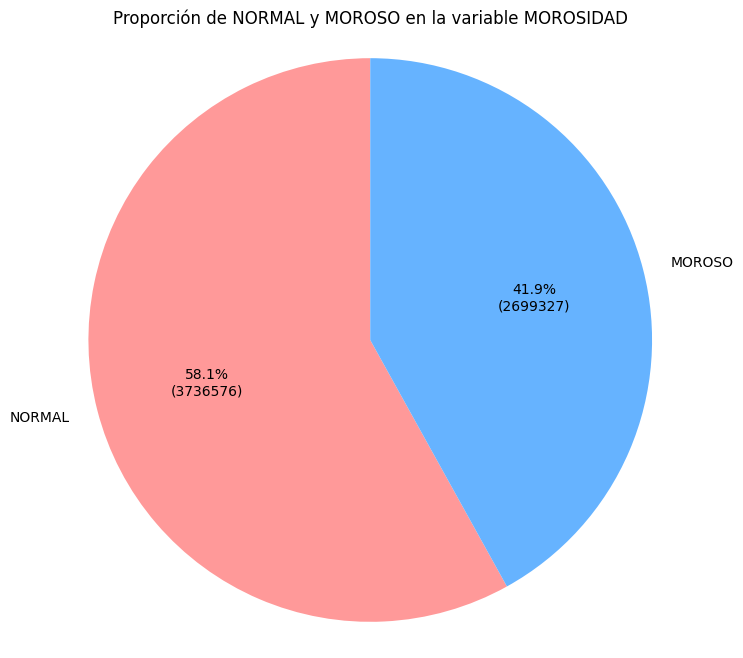

In [83]:
# Contar los valores de la columna MOROSIDAD
morosidad_counts = dataset_work_2['MOROSIDAD'].value_counts()

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct, v=val)
    return my_format

# Mapear los valores 0 y 1 a "NORMAL" y "MOROSO"
labels = ['MOROSO' if index == 1 else 'NORMAL' for index in morosidad_counts.index]

# Configurar el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(morosidad_counts, labels=labels, autopct=autopct_format(morosidad_counts), startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Proporción de NORMAL y MOROSO en la variable MOROSIDAD')
plt.axis('equal')  # Asegurar que el gráfico sea un círculo

# Mostrar el gráfico
plt.show()

In [84]:
conteo_if_trans_ley2936 = dataset_work_2['IF_TRANS_LEY2936'].value_counts()
print(conteo_if_trans_ley2936)

IF_TRANS_LEY2936
0.0    6435903
Name: count, dtype: int64


## Variable IF_TRANS_LEY2936


Como la variable IF_TRANS_LEY2936 no tiene aplicabilidad al momento de la extraccion de datos ya que coorresponde a la ley que aplica incentivo fiscal por el empleo de personas transexuales se lo elimina del dataset.

In [85]:
# Eliminar la columna 'IF_TRANS_LEY2936'
dataset_work_3 = dataset_work_2.drop(columns='IF_TRANS_LEY2936')

# Mostrar el DataFrame resultante
print(dataset_work_3.dtypes)

PERIODO                        int64
NRO                            int64
MONTO_IMPONIBLE              float64
IMPUESTO_IB                  float64
IMPUESTO_AD                  float64
PERCEPCIONES                 float64
RETENCIONES                  float64
IF_BENEFICIO_LEY6093         float64
IF_MECENAZCO_LEY1353         float64
IF_CALL_CENTER_LEY1669       float64
IF_SPONZORIZACION_LEY1772    float64
IF_PROCHACO_LEY1822          float64
IF_PYMES_LEY2077             float64
IF_GEMP_LEY2266              float64
IF_OTROS                     float64
EMPLEADOS                      int64
PROVINCIA                    float64
LOCALIDAD                    float64
CONDICION_AFIP               float64
TAMANO                       float64
ACTIVIDAD                    float64
MOROSIDAD                      int64
INFLACION                    float64
dtype: object


## Matríz de Correlación

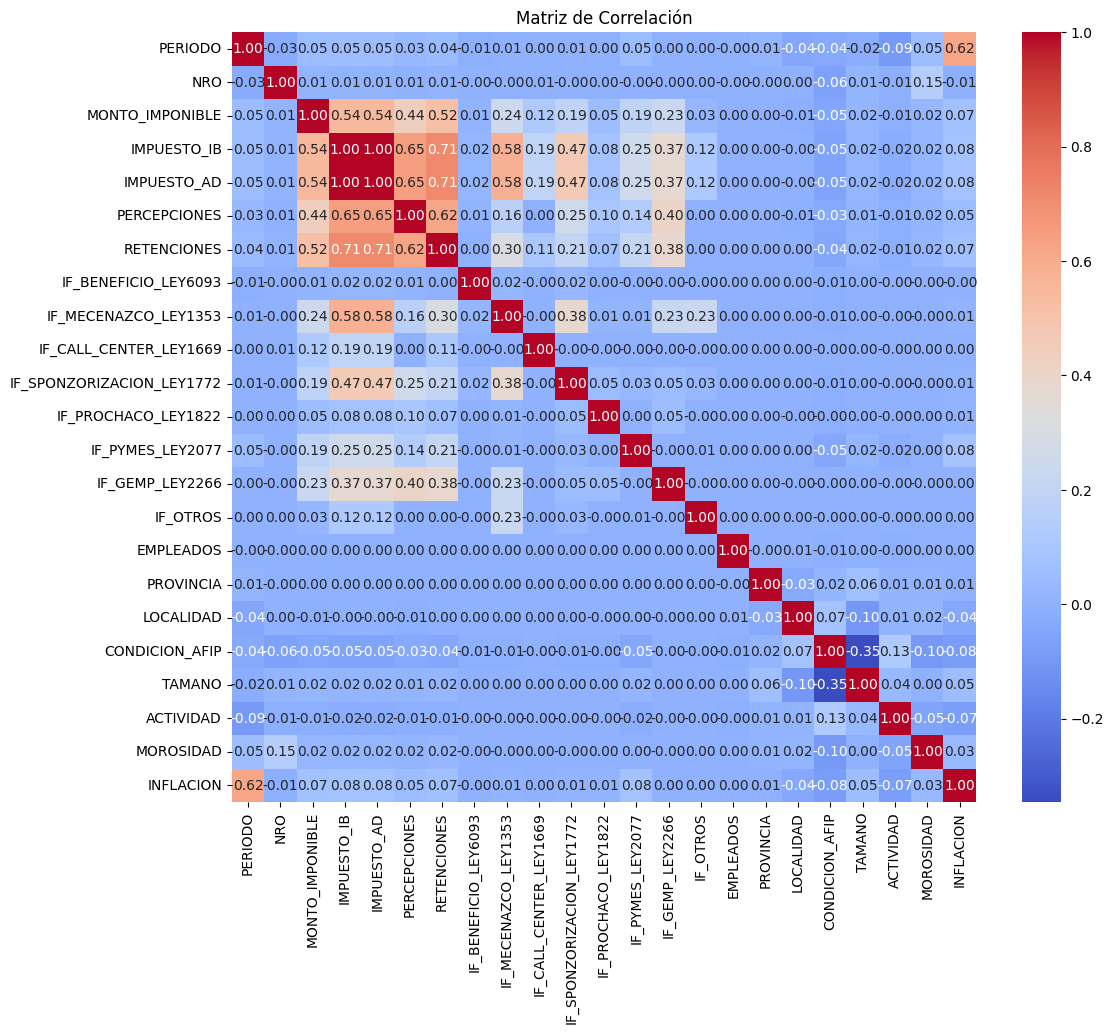

In [90]:
# Importar las librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
matriz_correlacion = dataset_work_3.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Resguardamos el DataSet

Resguardamos el dataset resultante en un nuevo archivo para poder seguir procesandolo.

In [ ]:
# Especifica el nombre del archivo CSV donde se guardarán los datos
output_file = 'D:\DataSet\dataset_work_1.csv'

# Guarda el DataFrame en un archivo CSV
dataset_work_3.to_csv(output_file, index=False, encoding='utf-8')

# Mensaje de confirmación
print(f'DataFrame guardado en {output_file}')

DataFrame guardado en D:\DataSet\dataset_work_1.csv
